# Mineração de Dados
### Exemplo prático
- **Equipe:** Arthus Santos, Laís Dib e Luã Maury
- **Assunto:** Tipo e qualidade de dados
- **Aula:** https://drive.google.com/file/d/1OQaMTNj9AUd3geV4YKPuI3Zs20Yj3ZVv/view

### Bases de Dados
Disponível em:
- [AutoMPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg)
- [Customer Shopping Trends Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset?select=shopping_trends_updated.csv)

### Drive com as informações
https://drive.google.com/drive/folders/1k0GjPsALz3s8LFEJRj9jl7r9v9RoQKxN?usp=sharing

## 1. Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Lendo os datasets

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

df_autompg = pd.read_csv("/content/drive/My Drive/Mineração de Dados/autompg.csv", sep=';')
df_shopping = pd.read_csv("/content/drive/My Drive/Mineração de Dados/shopping_trends_updated.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Identificando os atributos e seus tipos

### 3.1. Dataset utilizado: Customer Shopping Trends Dataset

- O conjunto de dados oferece informações valiosas sobre o comportamento do consumidor e os padrões de compra.
- Descrição dos atributos

  1. Customer ID – Identificador exclusivo para cada cliente
  2. Age - Idade do cliente
  3. Gender - Gênero do cliente
  4. Item Purchased - O item comprado pelo cliente
  5. Category - Categoria do item adquirido
  6. Purchase Amount (USD) - O valor da compra em USD
  7. Location – Local onde a compra foi realizada
  8. Size - Tamanho do item adquirido
  9. Color – Cor do item adquirido
  10. Season - Temporada durante a qual a compra foi feita
  11. Review Rating - Classificação dada pelo cliente para o item comprado
  12. Subscription Status - Indica se o cliente possui uma assinatura
  13. Shipping Type - Tipo de envio escolhido pelo cliente
  14. Discount Applied - Indica se foi aplicado desconto na compra
  15. Promo Code Used - Indica se um código promocional foi usado para a compra
  16. Previous Purchases - A contagem total de transações concluídas pelo cliente na loja, excluindo a transação em andamento
  17. Payment Method - Método de pagamento preferido do cliente
  18. Frequency of Purchases - Frequência com que o cliente realiza compras

In [ ]:
df_shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


#### Tipagem dos atributos

In [ ]:
df_shopping.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

#### Exemplos de tipos de atributos
- Colunas _Gender_, _Category_ e _Size_ são exemplos de atributos nominais

In [ ]:
# All nominal attributes
nominal_data = {
    "Gender": [i for i in df_shopping["Gender"].unique()],
    "Item Purchased": [i for i in df_shopping["Item Purchased"].unique()],
    "Category": [i for i in df_shopping["Category"].unique()],
    "Location": [i for i in df_shopping["Location"].unique()],
    "Size": [i for i in df_shopping["Size"].unique()],
    "Color": [i for i in df_shopping["Color"].unique()],
    "Shipping Type": [i for i in df_shopping["Shipping Type"].unique()],
    "Payment Method": [i for i in df_shopping["Payment Method"].unique()]
}

nominal_data

{'Gender': ['Male', 'Female'],
 'Item Purchased': ['Blouse',
  'Sweater',
  'Jeans',
  'Sandals',
  'Sneakers',
  'Shirt',
  'Shorts',
  'Coat',
  'Handbag',
  'Shoes',
  'Dress',
  'Skirt',
  'Sunglasses',
  'Pants',
  'Jacket',
  'Hoodie',
  'Jewelry',
  'T-shirt',
  'Scarf',
  'Hat',
  'Socks',
  'Backpack',
  'Belt',
  'Boots',
  'Gloves'],
 'Category': ['Clothing', 'Footwear', 'Outerwear', 'Accessories'],
 'Location': ['Kentucky',
  'Maine',
  'Massachusetts',
  'Rhode Island',
  'Oregon',
  'Wyoming',
  'Montana',
  'Louisiana',
  'West Virginia',
  'Missouri',
  'Arkansas',
  'Hawaii',
  'Delaware',
  'New Hampshire',
  'New York',
  'Alabama',
  'Mississippi',
  'North Carolina',
  'California',
  'Oklahoma',
  'Florida',
  'Texas',
  'Nevada',
  'Kansas',
  'Colorado',
  'North Dakota',
  'Illinois',
  'Indiana',
  'Arizona',
  'Alaska',
  'Tennessee',
  'Ohio',
  'New Jersey',
  'Maryland',
  'Vermont',
  'New Mexico',
  'South Carolina',
  'Idaho',
  'Pennsylvania',
  'Conne

In [ ]:
# Nominal attributes with few possible values for better visualization
nominal_data = {
    "Gender": [i for i in df_shopping["Gender"].unique()],
    "Category": [i for i in df_shopping["Category"].unique()],
    "Size": [i for i in df_shopping["Size"].unique()]
}

nominal_data

{'Gender': ['Male', 'Female'],
 'Category': ['Clothing', 'Footwear', 'Outerwear', 'Accessories'],
 'Size': ['L', 'S', 'M', 'XL']}

- Colunas _Subscription Status_, _Discount Applied_ e _Promo Code Used_ representam atributos binários

In [ ]:
binary_data = {
    "Subscription Status": [i for i in df_shopping["Subscription Status"].unique()],
    "Discount Applied": [i for i in df_shopping["Discount Applied"].unique()],
    "Promo Code Used": [i for i in df_shopping["Promo Code Used"].unique()]
}

binary_data

{'Subscription Status': ['Yes', 'No'],
 'Discount Applied': ['Yes', 'No'],
 'Promo Code Used': ['Yes', 'No']}

- Colunas _Age_,  _Purchase Amount (USD)_ e _Review Rating_ representa um atributo ordinal

In [ ]:
df_shopping["Age"].sort_values()

2224    18
2241    18
1612    18
418     18
736     18
        ..
329     70
325     70
1605    70
1122    70
921     70
Name: Age, Length: 3900, dtype: int64

In [ ]:
df_shopping["Purchase Amount (USD)"].sort_values(ascending=False)

2842    100
95      100
581     100
1421    100
3837    100
       ... 
1704     20
294      20
977      20
508      20
2798     20
Name: Purchase Amount (USD), Length: 3900, dtype: int64

In [ ]:
df_shopping["Review Rating"].sort_values(ascending=False)

776     5.0
1664    5.0
1277    5.0
2632    5.0
965     5.0
       ... 
1451    2.5
3473    2.5
1449    2.5
133     2.5
870     2.5
Name: Review Rating, Length: 3900, dtype: float64

- Colunas _Season_ e _Frequenxy of Purchases_ representam atributos do tipo intervalo

In [ ]:
interval_data = {
    "Season": [i for i in df_shopping["Season"].unique()],
    "Frequency of Purchases": [i for i in df_shopping["Frequency of Purchases"].unique()]
}

interval_data

{'Season': ['Winter', 'Spring', 'Summer', 'Fall'],
 'Frequency of Purchases': ['Fortnightly',
  'Weekly',
  'Annually',
  'Quarterly',
  'Bi-Weekly',
  'Monthly',
  'Every 3 Months']}

### 3.2. Dataset utilizado: AutoMPG

- O conjunto de dados se refere ao consumo de combustível no ciclo urbano em milhas por galão.
- Descrição dos atributos

  1. mpg – Milhas por galão consumidos pelo carro
  2. cylinders - Cilindros
  3. displacement - Deslocamento
  4. horsepower - Cavalos de potência
  5. weight - Peso
  6. acceleration - Aceleração
  7. modelyear – Ano que o modelo do carro foi lançado
  8. origin - País de fabricação do veículo
  9. name – Nome do carro (ID)

In [ ]:
df_autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


#### Tipagem dos atributos

In [ ]:
df_autompg.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelyear       float64
origin          float64
name             object
dtype: object

#### Exemplo de atributos dicretos e contínuos
- Colunas _cylinders_, _modelyear_ e _origin_ representam atributos discretos
- Valores do atributo _origin_: {1: Estados Unidos, 2: Europa, 3: Japão}

In [ ]:
discrete_data = {
    "cylinders": [i for i in df_autompg["cylinders"].unique()],
    "modelyear": [i for i in df_autompg["modelyear"].unique()],
    "origin": [i for i in df_autompg["origin"].unique()]
}

discrete_data

{'cylinders': [8.0, 4.0, 6.0, 3.0, 5.0],
 'modelyear': [70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0],
 'origin': [1.0, 2.0, 3.0]}

- Colunas _mpg_, _displacement_, _horsepower_, _weigth_ e _acceleration_ representam atributos contínuos

In [ ]:
continuos_data = {
    "mpg": df_autompg["mpg"].unique(),
    "displacement": df_autompg["displacement"].unique(),
    "horsepower": df_autompg["horsepower"].unique(),
    "weight": df_autompg["weight"].unique(),
    "acceleration": df_autompg["weight"].unique()
}

continuos_data

{'mpg': array([18. , 15. , 16. , 17. , 14. ,  nan, 24. , 22. , 21. , 27. , 26. ,
        25. , 10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. ,
        35. , 20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5,
        29.5, 26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1,
        36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6,
        18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6,
        16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4,
        34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2,
        26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8,
        44.3, 43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6,
        25.8, 23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7,
        32.9, 31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ]),
 'displacement': array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
        390. , 133. , 351. ,

- Coluna _name_ representa um atributo único para cada instância

## 4. Investigando a qualidade dos dados
- Dataset: AutoMPG

### 4.1. Identificação de ruídos e outliers

In [ ]:
df_autompg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
columns = df_autompg.describe().columns
discrete_columns = ["cylinders", "modelyear", "origin"]
continue_columns = [column for column in columns if column not in discrete_columns]

- Visualização de outliers: Gráfico Boxplot

  - Fornece uma maneira fácil de entender a distribuição dos dados e identificar a presença de outliers.
  - Elementos que o compõem:
  
    1. **Caixa (Box):** A caixa representa o intervalo interquartil (IQR), que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Em outras palavras, a caixa cobre a maioria dos dados, representando os 50% centrais do conjunto.

    2. **Linha dentro da Caixa:** Esta linha representa a mediana, que é o valor que divide os dados ao meio. Metade dos dados estão acima da mediana e metade estão abaixo.

    3. **Whiskers (Cerquinhas):** Os whiskers são as linhas que se estendem a partir da caixa. Eles indicam a extensão dos dados. Em um boxplot típico, os whiskers se estendem até 1,5 vezes o IQR a partir das bordas da caixa. Qualquer valor fora dessa extensão é considerado um outlier e é representado como um ponto individual.

    4. **Pontos (Outliers):** Pontos individuais além dos whiskers são considerados outliers. Eles são valores que estão significativamente distantes dos outros valores no conjunto de dados.

  - Portanto, ao olhar para um boxplot:

    - **A caixa representa a maioria dos dados.**
    - **A linha dentro da caixa é a mediana.**
    - **Os whiskers mostram a variação dos dados, excluindo outliers.**
    - **Pontos fora dos whiskers são considerados outliers.**

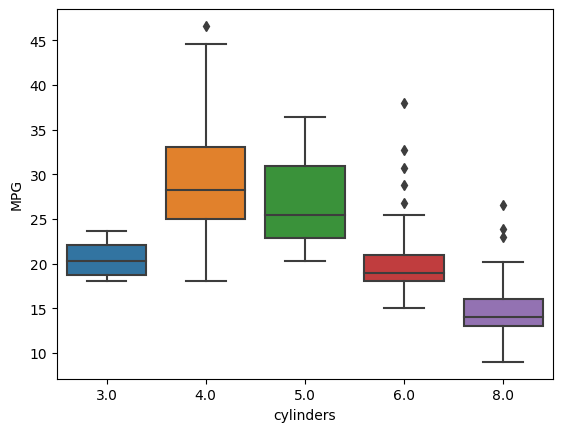

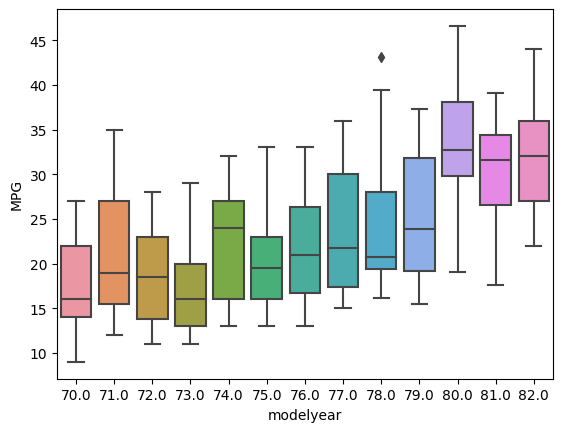

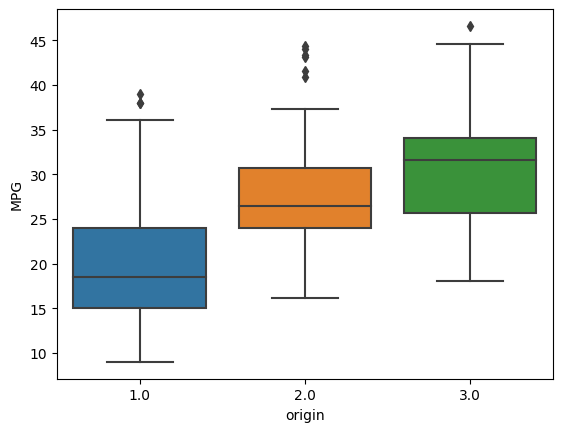

In [ ]:
for column in discrete_columns:
  sns.boxplot(x=df_autompg[column], y=df_autompg["mpg"])
  plt.xlabel(str(column))
  plt.ylabel("MPG")
  plt.show()
  print()

- Visualização de outliers e correlação entre os dados: Gráfico de Dispersão

  - Utiliza pontos em um plano para mostrar a relação entre duas variáveis. Cada ponto no gráfico representa uma instância no conjunto de dados e sua posição ao longo dos eixos x e y indica os valores das duas variáveis que estão sendo comparadas.
  - Elementos que o compõem:

    1. **Eixos X e Y:** representam as variáveis a serem comparadas e analisadas.

    2. **Padrão de Dispersão:** A dispersão dos pontos no gráfico mostra a relação entre as duas variáveis. Se os pontos estiverem espalhados de forma aleatória, isso sugere uma falta de correlação. Se os pontos estiverem inclinados em uma direção específica (para cima ou para baixo), isso indica uma correlação positiva ou negativa, respectivamente.

      - **Correlação Positiva:** Se os pontos no gráfico subirem da esquerda para a direita, isso sugere uma correlação positiva. Isso significa que, à medida que uma variável aumenta, a outra variável também tende a aumentar.
      
      - **Correlação Negativa:** Se os pontos no gráfico descerem da esquerda para a direita, isso sugere uma correlação negativa. Isso significa que, à medida que uma variável aumenta, a outra variável tende a diminuir.

    3. **Avaliação de Padrões e Tendências:** Ao observar o padrão formado pelos pontos no gráfico, você pode identificar tendências ou padrões nos dados.

    4. **Identificação de Outliers:** Pontos que estão significativamente distantes dos outros podem indicar valores atípicos ou outliers.

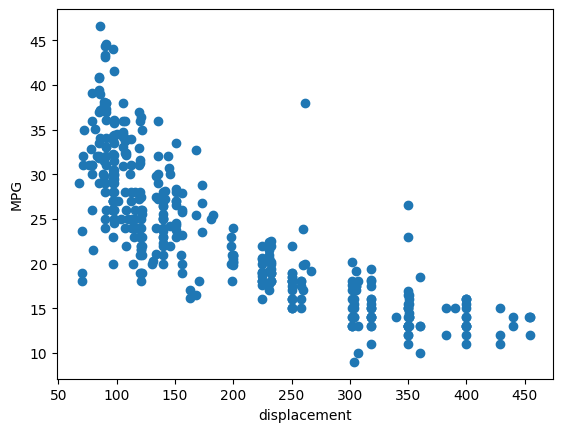

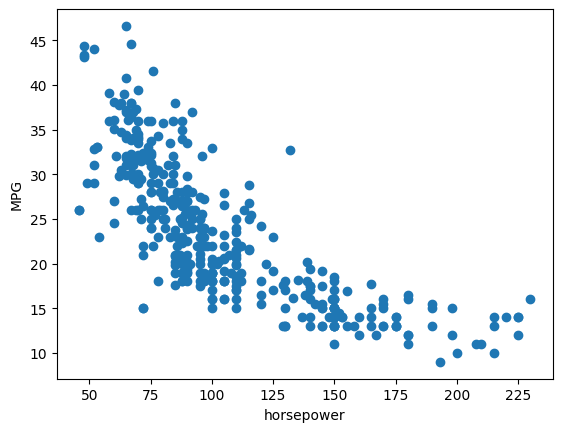

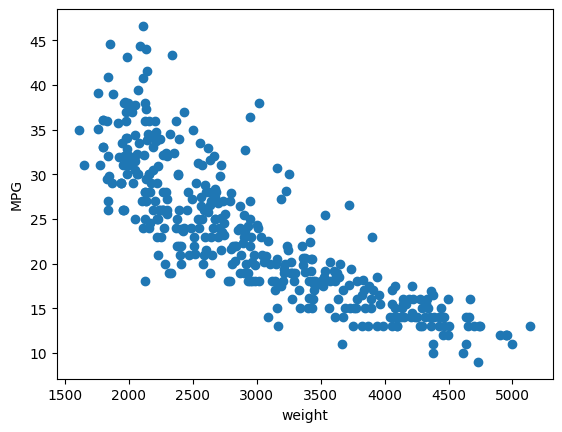

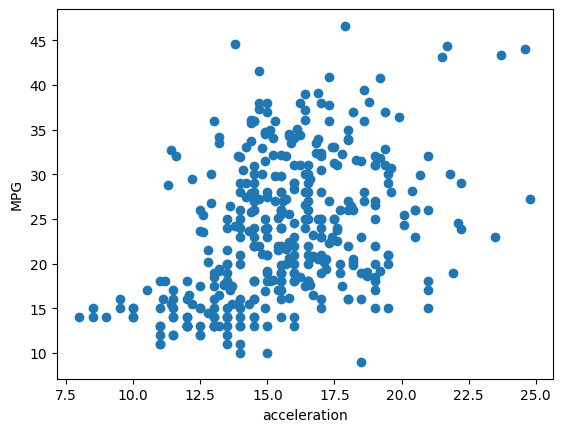

In [ ]:
for column in continue_columns:
  if column != "mpg":
    plt.scatter(df_autompg[column], df_autompg["mpg"])
    plt.xlabel(str(column))
    plt.ylabel("MPG")
    plt.show()

    print()

### 4.2. Idenficação de dados faltantes

In [ ]:
df_autompg.isna().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
modelyear       False
origin          False
name            False
dtype: bool

In [ ]:
print(f"Quantidade de exemplos: {len(df_autompg)}")

Quantidade de exemplos: 406


In [ ]:
mpg_isna = df_autompg["mpg"].isna().sum()
print(f"Quantidade de exemplos faltates na coluna MPG: {mpg_isna}\n")

index_mpg_isna = df_autompg[df_autompg["mpg"].isna()].index
df_autompg[df_autompg["mpg"].isna()]

Quantidade de exemplos faltates na coluna MPG: 8



,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [ ]:
horsepower_isna = df_autompg["horsepower"].isna().sum()
print(f"Quantidade de exemplos faltates na coluna Horsepower: {horsepower_isna}\n")

index_horsepower_isna = df_autompg[df_autompg["horsepower"].isna()].index
df_autompg[df_autompg["horsepower"].isna()]

Quantidade de exemplos faltates na coluna Horsepower: 6



,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


- Removendo dados faltantes

In [ ]:
df_autompg_clear = df_autompg.dropna()
print(f"Quantidade de exemplos: {len(df_autompg_clear)}\n")

df_autompg_clear.isna().any()

Quantidade de exemplos: 392



mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
modelyear       False
origin          False
name            False
dtype: bool

In [ ]:
df_autompg_clear[df_autompg_clear["mpg"].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name


In [ ]:
df_autompg_clear[df_autompg_clear["horsepower"].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name


- Estimandos dados faltantes
  - Pode ser feito com a média, mediana, moda, entre outros.

In [ ]:
df_autompg_mean = df_autompg
df_autompg_median = df_autompg
df_autompg_mode = df_autompg

In [ ]:
df_autompg_mean["mpg"].fillna(df_autompg_mean["mpg"].mean(), inplace=True)
df_autompg_median["mpg"].fillna(df_autompg["mpg"].median(), inplace=True)
df_autompg_mode["mpg"].fillna(df_autompg["mpg"].mode()[0], inplace=True)

In [ ]:
df_autompg_mean["horsepower"].fillna(df_autompg["horsepower"].mean(), inplace=True)
df_autompg_median["horsepower"].fillna(df_autompg["horsepower"].median(), inplace=True)
df_autompg_mode["horsepower"].fillna(df_autompg["horsepower"].mode()[0], inplace=True)

In [ ]:
index_is_na = [i for i in index_mpg_isna]

for i in index_horsepower_isna:
  index_is_na.append(i)

index_is_na = sorted(index_is_na)

In [ ]:
df_autompg_mean.iloc[index_is_na]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
10,23.514573,4.0,133.0,115.0000,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,23.514573,8.0,350.0,165.0000,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,23.514573,8.0,351.0,153.0000,4034.0,11.0,70.0,1.0,ford torino (sw)
13,23.514573,8.0,383.0,175.0000,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,23.514573,8.0,360.0,175.0000,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,23.514573,8.0,302.0,140.0000,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.000000,4.0,98.0,105.0825,2046.0,19.0,71.0,1.0,ford pinto
39,23.514573,4.0,97.0,48.0000,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.000000,6.0,200.0,105.0825,2875.0,17.0,74.0,1.0,ford maverick
337,40.900000,4.0,85.0,105.0825,1835.0,17.3,80.0,2.0,renault lecar deluxe


In [ ]:
df_autompg_median.iloc[index_is_na]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
10,23.514573,4.0,133.0,115.0000,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,23.514573,8.0,350.0,165.0000,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,23.514573,8.0,351.0,153.0000,4034.0,11.0,70.0,1.0,ford torino (sw)
13,23.514573,8.0,383.0,175.0000,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,23.514573,8.0,360.0,175.0000,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,23.514573,8.0,302.0,140.0000,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.000000,4.0,98.0,105.0825,2046.0,19.0,71.0,1.0,ford pinto
39,23.514573,4.0,97.0,48.0000,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.000000,6.0,200.0,105.0825,2875.0,17.0,74.0,1.0,ford maverick
337,40.900000,4.0,85.0,105.0825,1835.0,17.3,80.0,2.0,renault lecar deluxe


In [ ]:
df_autompg_mode.iloc[index_is_na]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
10,23.514573,4.0,133.0,115.0000,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,23.514573,8.0,350.0,165.0000,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,23.514573,8.0,351.0,153.0000,4034.0,11.0,70.0,1.0,ford torino (sw)
13,23.514573,8.0,383.0,175.0000,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,23.514573,8.0,360.0,175.0000,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,23.514573,8.0,302.0,140.0000,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.000000,4.0,98.0,105.0825,2046.0,19.0,71.0,1.0,ford pinto
39,23.514573,4.0,97.0,48.0000,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.000000,6.0,200.0,105.0825,2875.0,17.0,74.0,1.0,ford maverick
337,40.900000,4.0,85.0,105.0825,1835.0,17.3,80.0,2.0,renault lecar deluxe


### 4.3. Identificação de dados duplicados

In [ ]:
df_autompg.duplicated().any()

False

In [ ]:
df_shopping.duplicated().any()

False

## 5. Descrição estatística
- Verificando simetria dos dados: Gráfico de Densidade
  - Mostra como os valores estão distribuídos ao longo de uma variável contínua.
  - Elementos que o compõem:

    1. **Eixo Horizontal (X):** composto pelos valores da variável que está sendo analisada.

    2. **Eixo Vertical (Y):** composto pela densidade ou frequência relativa dos valores.

    3. **Formato da Curva:** indica a forma da distribuição dos dados.
      - **Curva Simétrica:** Se a curva é simétrica em torno de um ponto central, isso sugere uma distribuição simétrica. Por exemplo, uma distribuição normal é simétrica.
      - **Curva Assimétrica:** Se a curva é inclinada para um lado, isso indica uma distribuição assimétrica. Se inclina para a direita, é uma assimetria positiva (ou à direita), e se inclina para a esquerda, é uma assimetria negativa (ou à esquerda).

  - Em resumo, um gráfico de densidade oferece uma maneira intuitiva de entender a distribuição dos dados. Ele ajuda a identificar padrões, como simetria ou assimetria, e fornece uma visão clara sobre a concentração dos valores ao longo da variável contínua.

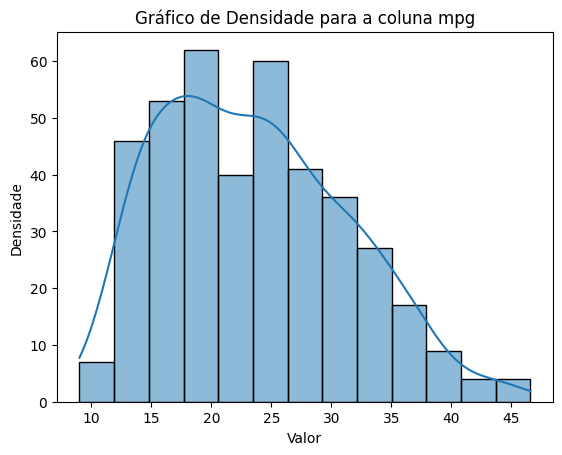

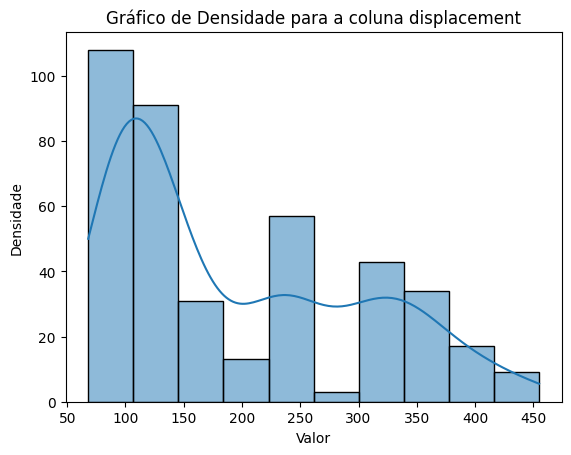

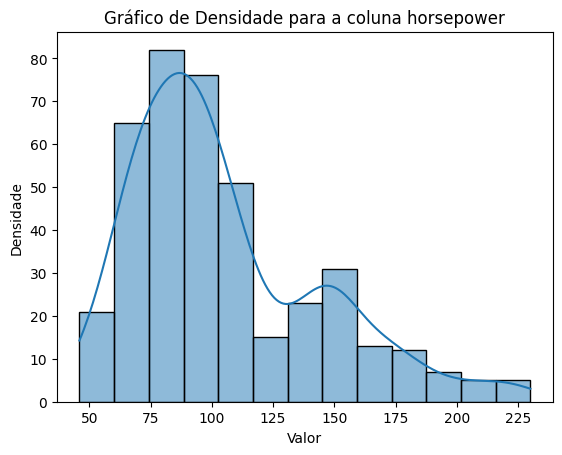

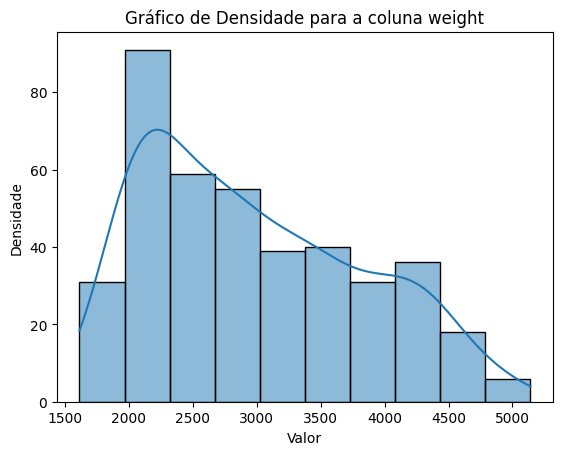

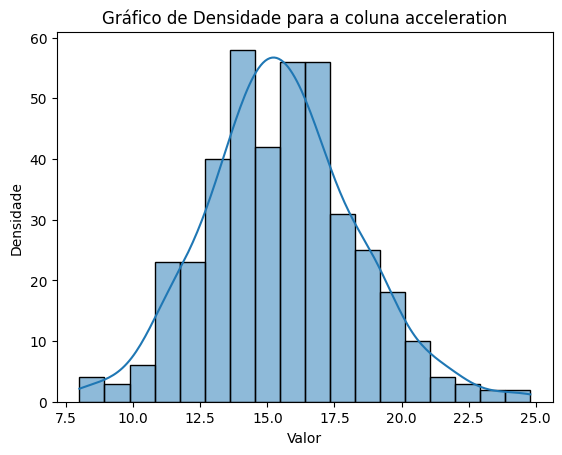

In [ ]:
for column in continue_columns:
  sns.histplot(df_autompg[column], kde=True)
  plt.xlabel("Valor")
  plt.ylabel("Densidade")
  plt.title(f"Gráfico de Densidade para a coluna {column}")
  plt.show()
  print()